<a href="https://colab.research.google.com/github/AlexeyTri/DL_HSE/blob/main/DL_seminar_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch

In [42]:
a = torch.tensor([
    [1., 2., 3.],
    [4., 5., 6.]
], dtype=torch.float16)
a

tensor([[1., 2., 3.],
        [4., 5., 6.]], dtype=torch.float16)

In [3]:
type(a)

torch.Tensor

In [4]:
a.dtype

torch.float16

In [43]:
a = torch.randn(3, 4)
a

tensor([[ 0.9544,  0.2353, -1.0979, -1.2303],
        [-0.2692,  0.2670, -0.0200,  1.1370],
        [-0.0538, -1.1717, -0.7350, -1.0937]])

In [44]:
a.shape

torch.Size([3, 4])

In [45]:
b = torch.rand(3, 4)
b

tensor([[0.2645, 0.8084, 0.8258, 0.4429],
        [0.9371, 0.6468, 0.3026, 0.1279],
        [0.3717, 0.4064, 0.1751, 0.6846]])

In [8]:
a + b

tensor([[ 1.2170, -0.1632,  0.2637,  0.1519],
        [-0.9282,  0.8401,  0.3639, -0.1437],
        [ 1.4639, -0.3364,  0.5838, -0.9892]])

In [9]:
a * b

tensor([[ 0.3692, -0.0817,  0.0085, -0.0330],
        [-0.7055, -0.0530,  0.0081, -0.2855],
        [ 0.2274, -0.5547,  0.0465, -0.0905]])

In [10]:
torch.sin(a) / torch.exp(b)

tensor([[ 0.2872, -0.2981,  0.0298, -0.0918],
        [-0.6027, -0.0240,  0.0171, -0.3595],
        [ 0.8046, -0.4426,  0.4268, -0.8078]])

In [46]:
a = torch.randn(5, 2)
b = torch.randn(2, 4)

In [12]:
(a @ b).shape

torch.Size([5, 4])

In [74]:
a = torch.randn(1, requires_grad=True)
a

tensor([1.8169], requires_grad=True)

In [75]:
l = (a ** 2).sum()
l

tensor(3.3012, grad_fn=<SumBackward0>)

In [49]:
l.shape

torch.Size([])

In [76]:
l.backward()

In [77]:
a.grad

tensor([3.6338])

In [80]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [67]:
a = torch.randn(2, 3, requires_grad=True)
b = torch.randn(2, 3, requires_grad=False)
c = torch.randn(2, 3, requires_grad=True)

In [68]:
loss = (torch.cos(a / 3) + torch.sqrt(torch.abs(b * c))).sum(dim=0).prod(dim=0)
loss

tensor(39.6613, grad_fn=<ProdBackward1>)

In [20]:
loss.backward()

In [21]:
a.grad

tensor([[-2.2473, -3.8659, -1.9792],
        [-0.5298, -0.7782, -2.7216]])

In [22]:
c.grad

tensor([[  4.8032,  -7.1500, -11.8380],
        [ -9.0518,  -9.8907, -13.9398]])

In [23]:
b.grad

In [24]:
device = torch.device('cpu')
#device = torch.device('mps')
#device

после выюра GPU смотрим какая видеокарта нам доступна

In [1]:
!nvidia-smi

Fri Apr 21 16:19:58 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P8    13W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [4]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [5]:
A = torch.randn(10000, 10000)
B = torch.randn(10000, 10000)

In [7]:
A.device

device(type='cpu')

In [8]:
%%time
A @ B

CPU times: user 16.2 s, sys: 208 ms, total: 16.4 s
Wall time: 16.4 s


tensor([[ -91.4831,  102.8736,  -33.7411,  ..., -114.4666,   19.7804,
           46.7449],
        [-207.9673,  -47.6254,   62.8661,  ...,   85.0518, -245.6175,
          -79.7172],
        [-104.3959,   66.9630, -146.4498,  ..., -208.2020,    6.3920,
         -111.8621],
        ...,
        [  45.4070,   96.0092,    2.1880,  ...,   -6.3115,  -62.8318,
           47.6873],
        [ -33.0139, -115.8897,   51.1560,  ...,  -54.0518,   63.1564,
         -157.9431],
        [   4.7602,    5.7944, -141.7197,  ...,  -63.8831,  152.3646,
          -29.2544]])

In [9]:
A = A.to(device)
B = B.to(device)

In [10]:
%%time
A @ B

CPU times: user 418 ms, sys: 252 ms, total: 670 ms
Wall time: 2.27 s


tensor([[ -91.4831,  102.8736,  -33.7410,  ..., -114.4667,   19.7804,
           46.7453],
        [-207.9681,  -47.6254,   62.8659,  ...,   85.0518, -245.6175,
          -79.7173],
        [-104.3952,   66.9633, -146.4497,  ..., -208.2017,    6.3923,
         -111.8620],
        ...,
        [  45.4070,   96.0093,    2.1880,  ...,   -6.3116,  -62.8318,
           47.6871],
        [ -33.0140, -115.8893,   51.1562,  ...,  -54.0517,   63.1564,
         -157.9433],
        [   4.7602,    5.7943, -141.7199,  ...,  -63.8829,  152.3645,
          -29.2543]], device='cuda:0')

In [11]:
!ls /Users/isadrtdinov/datasets/

ls: cannot access '/Users/isadrtdinov/datasets/': No such file or directory


In [2]:
from torchvision.datasets import MNIST

In [3]:
train_set = MNIST(root='~/datasets/mnist', train=True, download=True)
test_set = MNIST(root='~/datasets/mnist', train=False, download=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 226453396.03it/s]

Extracting /root/datasets/mnist/MNIST/raw/train-images-idx3-ubyte.gz to /root/datasets/mnist/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 43032218.05it/s]


Extracting /root/datasets/mnist/MNIST/raw/train-labels-idx1-ubyte.gz to /root/datasets/mnist/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 145763423.61it/s]

Extracting /root/datasets/mnist/MNIST/raw/t10k-images-idx3-ubyte.gz to /root/datasets/mnist/MNIST/raw




100%|██████████| 4542/4542 [00:00<00:00, 19559064.44it/s]


Extracting /root/datasets/mnist/MNIST/raw/t10k-labels-idx1-ubyte.gz to /root/datasets/mnist/MNIST/raw



In [4]:
len(train_set)

60000

In [5]:
out = train_set[12675]

In [6]:
out

(<PIL.Image.Image image mode=L size=28x28 at 0x7FECF1C7AC40>, 4)

In [7]:
train_set.data.shape

torch.Size([60000, 28, 28])

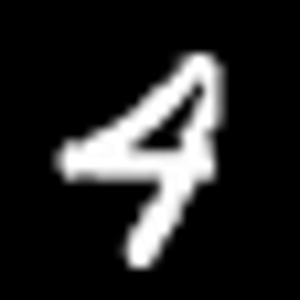

In [18]:
out[0].resize((300, 300))

In [34]:
torch.from_numpy?

In [20]:
import torchvision.transforms as T
from torch.utils.data import DataLoader

In [119]:
transform = T.Compose([
    T.ToTensor(),
    T.Resize(28),
])

In [120]:
train_set = MNIST(root='~/datasets/mnist', transform=transform, train=True, download=True)
test_set = MNIST(root='~/datasets/mnist', transform=transform, train=False, download=True)

In [27]:
out = train_set[12675]

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [35]:
out

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 4)

In [29]:
out[0]

tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]])

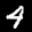

In [36]:
to_image = T.ToPILImage()
to_image(out[0])

In [38]:
DataLoader?

In [121]:
train_loader = DataLoader(train_set, batch_size=64, shuffle=True, num_workers=4, pin_memory=True)
test_loader = DataLoader(test_set, batch_size=64, shuffle=False, num_workers=4, pin_memory=True)

In [122]:
for batch in train_loader:
    break

/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the 

In [123]:
batch[0].shape

torch.Size([64, 1, 28, 28])

In [41]:
batch[1].shape

torch.Size([64])

In [81]:
from torch import nn

In [84]:
class MLP(nn.Module):
    def __init__(self):
        super().__init__()
        self.model = nn.Sequential(
            nn.Linear(in_features=28*28, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=64),
            nn.ReLU(),
            nn.Linear(in_features=64, out_features=10)
        )
    
    def forward(self, x):
        return self.model(x)

In [85]:
model = MLP()

In [86]:
model

MLP(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=64, bias=True)
    (1): ReLU()
    (2): Linear(in_features=64, out_features=64, bias=True)
    (3): ReLU()
    (4): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [89]:
x = torch.randn(64, 28*28)

In [90]:
y = model(x)

In [92]:
y.shape

torch.Size([64, 10])

In [96]:
x[0].unsqueeze(1).squeeze().shape

torch.Size([784])

теперь модель необходимо оптимизировать

In [97]:
torch.optim.SGD?

In [99]:
for name, param in model.named_parameters():
    print(name, param.shape)

model.0.weight torch.Size([64, 784])
model.0.bias torch.Size([64])
model.2.weight torch.Size([64, 64])
model.2.bias torch.Size([64])
model.4.weight torch.Size([10, 64])
model.4.bias torch.Size([10])


In [102]:
type(model.model[0].weight.data)

torch.Tensor

In [125]:
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import clear_output
from tqdm.notebook import tqdm


sns.set_style('whitegrid')
plt.rcParams.update({'font.size': 15})


def plot_losses(train_losses, test_losses, train_accuracies, test_accuracies):
    clear_output()
    fig, axs = plt.subplots(1, 2, figsize=(13, 4))
    axs[0].plot(range(1, len(train_losses) + 1), train_losses, label='train')
    axs[0].plot(range(1, len(test_losses) + 1), test_losses, label='test')
    axs[0].set_ylabel('loss')

    axs[1].plot(range(1, len(train_accuracies) + 1), train_accuracies, label='train')
    axs[1].plot(range(1, len(test_accuracies) + 1), test_accuracies, label='test')
    axs[1].set_ylabel('accuracy')

    for ax in axs:
        ax.set_xlabel('epoch')
        ax.legend()

    plt.show()

In [131]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda', index=0)

In [133]:
num_epochs = 10
model = MLP()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=num_epochs)
criterion = nn.CrossEntropyLoss()

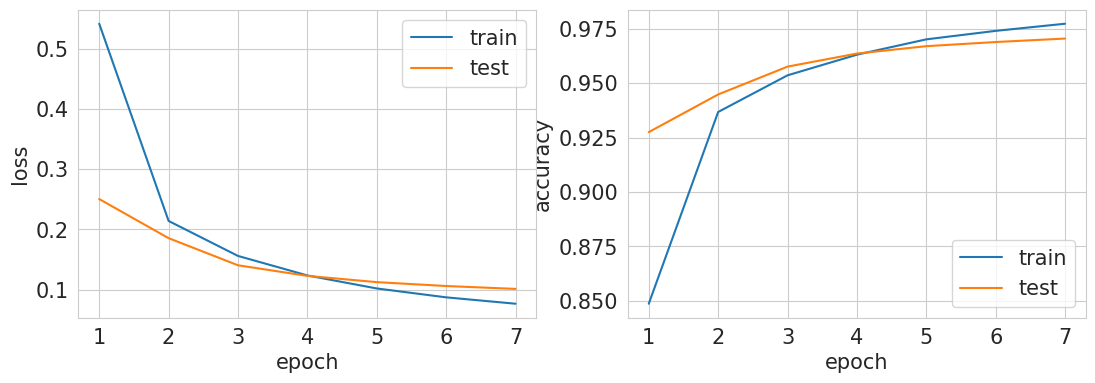

In [ ]:

train_losses, test_losses = [], []
train_accuracies, test_accuracies = [], []

for epoch in range(1, num_epochs + 1):
    model.train()
    running_loss, running_acc = 0.0, 0.0

    for images, labels in tqdm(train_loader, desc=f'Training {epoch}/{num_epochs}'):
        # images = images.to(device)
        # labels = labels.to(device)

        optimizer.zero_grad()
        logits = model(torch.flatten(images, start_dim=1))
        loss = criterion(logits, labels)
        loss.backward()
        optimizer.step()
        
        accuracy = (logits.argmax(dim=1) == labels).detach().cpu().sum().item()
        running_loss += loss.item() * images.shape[0]
        running_acc += accuracy

    scheduler.step()
    train_losses.append(running_loss / len(train_loader.dataset))
    train_accuracies.append(running_acc / len(train_loader.dataset))

    model.eval()
    running_loss, running_acc = 0.0, 0.0
    with torch.inference_mode():
        for images, labels in tqdm(test_loader, desc=f'Testing {epoch}/{num_epochs}'):
            # images = images.to(device)
            # labels = labels.to(device)

            logits = model(torch.flatten(images, start_dim=1))
            loss = criterion(logits, labels)

            accuracy = (logits.argmax(dim=1) == labels).detach().cpu().sum().item()
            running_loss += loss.item() * images.shape[0]
            running_acc += accuracy

    test_losses.append(running_loss / len(test_loader.dataset))
    test_accuracies.append(running_acc / len(test_loader.dataset))

    plot_losses(train_losses, test_losses, train_accuracies, test_accuracies)

In [135]:
model.state_dict()

OrderedDict([('model.0.weight',
              tensor([[ 0.0055, -0.0135, -0.0110,  ..., -0.0259,  0.0173, -0.0250],
                      [ 0.0355,  0.0152,  0.0050,  ..., -0.0029, -0.0010,  0.0351],
                      [-0.0221, -0.0078, -0.0195,  ...,  0.0100, -0.0239,  0.0280],
                      ...,
                      [ 0.0299,  0.0041,  0.0053,  ..., -0.0074,  0.0201, -0.0142],
                      [ 0.0086,  0.0100,  0.0034,  ...,  0.0112, -0.0090, -0.0349],
                      [-0.0350, -0.0209,  0.0242,  ..., -0.0131,  0.0238,  0.0129]])),
             ('model.0.bias',
              tensor([ 1.1284e-03,  7.5037e-02,  5.7973e-02,  1.4928e-01,  1.1293e-01,
                       3.7795e-02,  2.1048e-02,  1.0648e-01,  1.9905e-01,  5.7491e-02,
                      -4.4425e-02,  4.9450e-02, -3.9295e-02,  6.1191e-02,  1.3870e-01,
                       8.8579e-02,  6.2936e-02,  7.4963e-02, -2.7877e-02,  1.6132e-01,
                      -1.0081e-02,  3.0405e-03, -1.3501e

In [136]:
torch.save({
    'model_state': model.state_dict(),
    'optimizer_state': optimizer.state_dict(),
    'scheduler': scheduler.state_dict()
}, 'checkpoint.pt')

In [137]:
cpt = torch.load('checkpoint.pt')

In [1]:
model = MLP()
model.load_state_dict(cpt['model_state'])

NameError: ignored